# Here I want to merge together the data from different sources

In [9]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns

def violinplot_overall(df, x_topic='GENDER', y_topic='MAX_SUBJECT_AGE_IN_YEARS', hue_split='GENDER', bin_name='test_bin'):
    sns.violinplot(x=x_topic, y=y_topic, hue=hue_split, data=df[[x_topic, y_topic]], split=True)
    try:
        os.makedirs(f'{bin_name}')
    except FileExistsError:
    # directory already exists
        pass

    if bin_name != 'test_bin':
        plt.show()
    else:
        plt.savefig(f'{bin_name}/violin_overall.png')
    
    
def manhattanplot(df, start_col=8, end_col=-1, save_name='default'):
    if end_col == -1: 
        markers = df.columns[start_col:]
    else:
        markers = df.columns[start_col:end_col]
    expression_values = [df[col].median() for col in markers] 

    try:
        os.makedirs(f'{save_name}')
    except FileExistsError:
    # directory already exists
        pass

    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(markers, expression_values, s=10, color='blue', alpha=0.5)
    plt.xticks([])  # Remove x ticks
    plt.xlabel('Marker Name')
    plt.ylabel('Expression Value median')
    plt.title('median Gene Expression Dot Plot')
    plt.tight_layout()
    plt.savefig(f'{save_name}/manhattan_plot.png')
    plt.show()

## Step 1 10k immu

In [10]:
whole_blood_common = pd.read_csv('whole_blood/whole_blood_combi_common_columns.csv', index_col=0)
whole_blood_common.head()

/tmp/ipykernel_377570/2164701511.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  whole_blood_common = pd.read_csv('whole_blood/whole_blood_combi_common_columns.csv', index_col=0)


,age,data_accession,gender,study_accession,subject_accession,METHOD,A1BG,AAAS,AACS,AAGAB,...,ZSWIM3,ZSWIM4,ZSWIM6,ZSWIM7,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11B,ZYX
0,63.9,GSM2300358,male,SDY111,SUB116437,array,6.719146,6.616428,6.611353,6.797237,...,6.766212,6.998410,7.373335,7.110850,7.269965,6.569750,6.578005,6.927278,7.986142,9.860201
1,63.9,GSM2300366,male,SDY111,SUB116437,array,6.719146,6.616428,6.611353,6.797237,...,6.766212,6.998410,7.373335,7.110850,7.269965,6.569750,6.578005,6.927278,7.986142,9.860201
2,64.2,GSM2300371,female,SDY111,SUB116438,array,6.654298,6.541287,6.660898,6.914547,...,6.763582,6.806283,7.605019,7.039258,6.908788,6.508903,6.475662,6.890331,8.341373,9.574792
3,64.2,GSM2300363,female,SDY111,SUB116438,array,6.654298,6.541287,6.660898,6.914547,...,6.763582,6.806283,7.605019,7.039258,6.908788,6.508903,6.475662,6.890331,8.341373,9.574792
4,68.9,GSM2300374,female,SDY111,SUB116439,array,6.827266,6.510852,6.661860,6.727293,...,6.701604,7.085829,7.497473,7.288656,6.971838,6.526683,6.463560,7.080088,7.942043,9.636069


In [11]:
pbmc_common = pd.read_csv('pbmc/combi_df_pbmc_common_cols.csv', index_col=0)
pbmc_common.head()


/tmp/ipykernel_377570/2450806279.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  pbmc_common = pd.read_csv('pbmc/combi_df_pbmc_common_cols.csv', index_col=0)


,METHOD,PLATFORM_GEO_ID,PLATFORM_DESCRIPTION,gender,age,study_accession,data_accession,subject_accession,A1BG,A1BG-AS1,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,array,GPL13158,[HT_HG-U133_Plus_PM] Affymetrix HT HG-U133+ PM...,male,26.0,SDY269,GSM733843,SUB112829,3.935176,3.042625,...,4.498267,4.232767,3.708611,4.828217,4.846638,3.412313,5.664686,6.098643,5.227678,5.261385
1,array,GPL13158,[HT_HG-U133_Plus_PM] Affymetrix HT HG-U133+ PM...,male,40.0,SDY269,GSM733852,SUB112831,4.361805,3.066840,...,5.036122,4.216494,4.273056,4.930740,5.242478,3.396765,6.235532,5.913137,5.134200,5.313965
2,array,GPL13158,[HT_HG-U133_Plus_PM] Affymetrix HT HG-U133+ PM...,female,28.0,SDY269,GSM733855,SUB112836,4.032158,3.916259,...,4.804625,5.171382,3.873794,4.984857,5.309131,3.331202,6.004928,6.599657,5.568466,5.458854
3,array,GPL13158,[HT_HG-U133_Plus_PM] Affymetrix HT HG-U133+ PM...,male,39.0,SDY269,GSM733858,SUB112838,4.110399,2.998777,...,4.519992,4.391875,3.711245,4.814189,5.291147,3.223915,6.502887,6.297308,5.608189,5.258943
4,array,GPL13158,[HT_HG-U133_Plus_PM] Affymetrix HT HG-U133+ PM...,female,23.0,SDY269,GSM733861,SUB112839,3.977940,3.349387,...,4.745177,4.822295,4.069328,5.090906,5.450235,3.462637,6.578732,5.853746,5.815968,5.739715


In [29]:
metadata_cols = [
    'age',
    'study_accession',
    'gender', 
    'subject_accession', 
    'METHOD', 
    'PLATFORM_DESCRIPTION',
    'PLATFORM_GEO_ID',
    'data_accession'
    ]

common_columns = whole_blood_common.columns.intersection(pbmc_common.columns)



combi_df_all = pd.concat([whole_blood_common, pbmc_common], ignore_index=True)
print(combi_df_all.shape)

### Remove possible duplicated subjects and entries with Nan 
combi_df_all_reduced = combi_df_all.drop_duplicates()
combi_df_all_reduced = combi_df_all_reduced.drop_duplicates(subset=['subject_accession'], keep='first')
print(combi_df_all_reduced.shape)

## drop entries that dont fullfill those min metadata
essential_columns = ['age', 'gender', 'subject_accession']
combi_df_all_reduced = combi_df_all_reduced.dropna(subset=essential_columns, axis=0, how='any')
print(combi_df_all_reduced.shape)

combi_df_all_reduced.head()

(1095, 16237)
(953, 16237)
(953, 16237)


,age,data_accession,gender,study_accession,subject_accession,METHOD,A1BG,AAAS,AACS,AAGAB,...,ZSCAN30,ZSCAN4,ZSWIM2,ZSWIM5,ZUFSP,ZXDA,ZXDB,ZYG11A,ZZEF1,ZZZ3
0,63.9,GSM2300358,male,SDY111,SUB116437,array,6.719146,6.616428,6.611353,6.797237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,64.2,GSM2300371,female,SDY111,SUB116438,array,6.654298,6.541287,6.660898,6.914547,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68.9,GSM2300374,female,SDY111,SUB116439,array,6.827266,6.510852,6.661860,6.727293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,70.0,GSM2300362,male,SDY111,SUB116440,array,6.799737,6.570462,6.657240,6.882477,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,66.1,GSM2300359,male,SDY111,SUB116441,array,6.723763,6.600540,6.550790,6.751541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
combi_df_all_reduced.to_csv('10k_immu/combi_10k_all.csv')

In [40]:
no_meta_cols = list(set(common_columns) - set(metadata_cols))
print(len(no_meta_cols))
new_order_cols = metadata_cols + no_meta_cols
print(len(new_order_cols))

9232
9240


In [41]:
combi_df_common = combi_df_all_reduced[new_order_cols]
print(combi_df_common.shape)
combi_df_common.to_csv('10k_immu/combi_10k_common.csv')

(953, 9240)


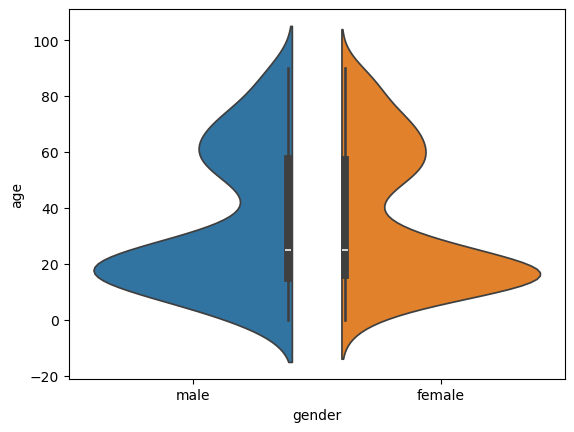

In [42]:
violinplot_overall(combi_df_common,  x_topic='gender', y_topic='age', hue_split='gender', bin_name='10k_immu')

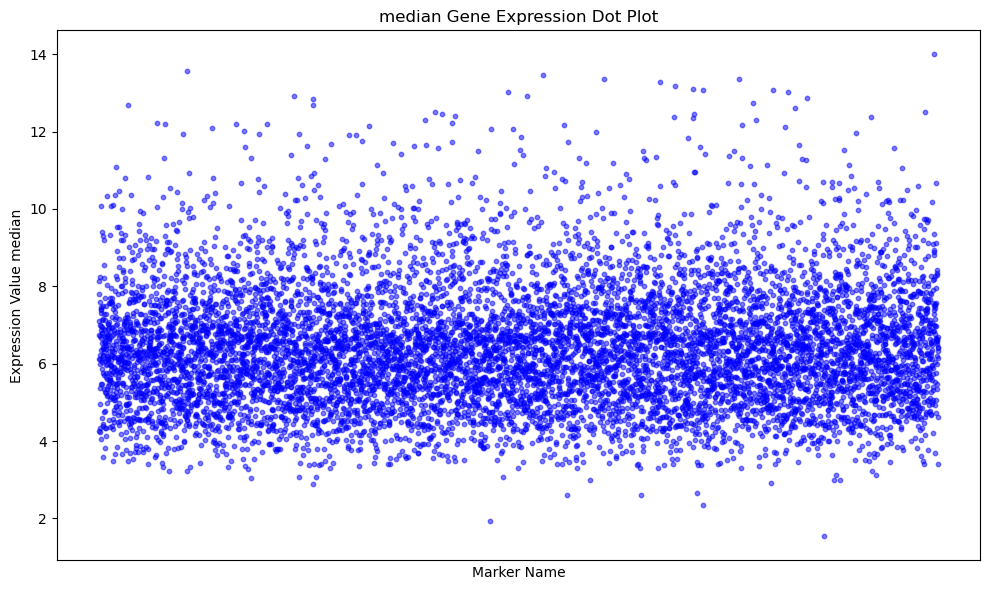

In [43]:
manhattanplot(combi_df_common, start_col=8, save_name='10k_immu/combi_10k_common')